### Name: Rohan Ingle
### PRN: 22070126047
### Batch: AIML A2 (2022-2026)

### Clustering

About dataset : Football Manager Dataset | source: <a href="[#](https://www.kaggle.com/datasets/ajinkyablaze/football-manager-data)">Kaggle</a>

This dataset has 89 columns and 159541 rows, the features are :

['UID', 'Name', 'NationID', 'Born', 'Age', 'IntCaps', 'IntGoals',
       'U21Caps', 'U21Goals', 'Height', 'Weight', 'AerialAbility',
       'CommandOfArea', 'Communication', 'Eccentricity', 'Handling', 'Kicking',
       'OneOnOnes', 'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing',
       'Corners', 'Crossing', 'Dribbling', 'Finishing', 'FirstTouch',
       'Freekicks', 'Heading', 'LongShots', 'Longthrows', 'Marking', 'Passing',
       'PenaltyTaking', 'Tackling', 'Technique', 'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions',
       'Determination', 'Flair', 'Leadership', 'OffTheBall', 'Positioning',
       'Teamwork', 'Workrate', 'Acceleration', 'Agility', 'Balance', 'Jumping',
       'LeftFoot', 'NaturalFitness', 'Pace', 'RightFoot', 'Stamina',
       'Strength', 'Consistency', 'Dirtiness', 'ImportantMatches',
       'InjuryProness', 'Versatility', 'Adaptability', 'Ambition', 'Loyalty',
       'Pressure', 'Professional', 'Sportsmanship', 'Temperament',
       'Controversy', 'PositionsDesc', 'Goalkeeper', 'Sweeper', 'Striker',
       'AttackingMidCentral', 'AttackingMidLeft', 'AttackingMidRight',
       'DefenderCentral', 'DefenderLeft', 'DefenderRight',
       'DefensiveMidfielder', 'MidfielderCentral', 'MidfielderLeft',
       'MidfielderRight', 'WingBackLeft', 'WingBackRight']

Unique Identifier (UID): Every entry has a unique ID.

Personal Information: This includes attributes like 'Name', 'NationID', 'Born' (date of birth formatted as DD-MM-YYYY), 'Age'.

Career Information: International caps ('IntCaps'), international goals ('IntGoals'), under-21 caps ('U21Caps'), and under-21 goals ('U21Goals').

Physical Attributes: Attributes such as 'Height' and 'Weight'.

Skill Ratings: Various skills are rated, possibly on a scale from 1 to 20, including 'AerialAbility', 'Dribbling', 'Finishing', and many more, indicating a player's abilities in specific areas.

Positional Play Ratings: Attributes indicate suitability in various playing positions, such as 'DefenderCentral', 'MidfielderCentral', 'WingBackLeft', etc., with values likely indicating proficiency or preferred playing positions.

This dataset is aquired from a game called Football Manager

First lets start by importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pickle as pkl
import warnings
from scipy.cluster.hierarchy import dendrogram, linkage
warnings.filterwarnings('ignore')

The below cell will be used to load our dataset into a dataframe using Pandas library - since we imported pandas as pd, we can use pd.read_csv(_dataset path_) to directly read our dataset from csv fromat and store in a pandas dataframe

In [2]:
dataset = pd.read_csv(r'../dataset.csv')

Note : Columns are vertically arranged and are also called features of a dataset

Lets see how our dataset looks like using below cell, we will just type the dataframe variable name and run it

In [3]:
dataset.head(5)

,UID,Name,NationID,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,...,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
0,1000055,Wilfred Bamnjo,11,27-03-1980,36,0,0,0,0,178,...,1,1,1,1,20,11,1,1,1,1
1,1000331,Wang Wei,110,20-02-1982,34,0,0,0,0,188,...,1,1,1,1,1,1,1,1,1,1
2,1000334,Liu Yang,110,11-04-1982,34,0,0,0,0,183,...,1,1,1,1,20,1,1,1,1,1
3,1000337,Song Qi,110,07-04-1985,31,0,0,0,0,170,...,1,1,1,1,1,1,1,1,1,1
4,1000340,Chen Lei,110,20-01-1983,33,0,0,0,0,181,...,1,1,1,1,1,1,1,1,1,1


In [4]:
dataset.columns

Index(['UID', 'Name', 'NationID', 'Born', 'Age', 'IntCaps', 'IntGoals',
       'U21Caps', 'U21Goals', 'Height', 'Weight', 'AerialAbility',
       'CommandOfArea', 'Communication', 'Eccentricity', 'Handling', 'Kicking',
       'OneOnOnes', 'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing',
       'Corners', 'Crossing', 'Dribbling', 'Finishing', 'FirstTouch',
       'Freekicks', 'Heading', 'LongShots', 'Longthrows', 'Marking', 'Passing',
       'PenaltyTaking', 'Tackling', 'Technique', 'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions',
       'Determination', 'Flair', 'Leadership', 'OffTheBall', 'Positioning',
       'Teamwork', 'Workrate', 'Acceleration', 'Agility', 'Balance', 'Jumping',
       'LeftFoot', 'NaturalFitness', 'Pace', 'RightFoot', 'Stamina',
       'Strength', 'Consistency', 'Dirtiness', 'ImportantMatches',
       'InjuryProness', 'Versatility', 'Adaptability', 'Ambition', 'Loyalty',
       'Pressure', 'Professional',

Now, we will check if our dataset has any null values or not using the below cell

In [5]:
dataset.isna().sum()

UID                  0
Name                 0
NationID             0
Born                 0
Age                  0
                    ..
MidfielderCentral    0
MidfielderLeft       0
MidfielderRight      0
WingBackLeft         0
WingBackRight        0
Length: 89, dtype: int64

Lets first check what features are non integer in our dataset

In [6]:
non_numerical_list = []

for col in dataset.columns:
    if not isinstance(dataset.loc[2, col], np.int64):
        non_numerical_list.append(col)

print(non_numerical_list)

['Name', 'Born', 'PositionsDesc']


In [7]:
for non_numerical_features in non_numerical_list:
    print(type(non_numerical_features))

<class 'str'>
<class 'str'>
<class 'str'>


Since we have features with values in a string format, we can either convert them to numerical format or drop them if they do not seem to be necessary

Since ['Name', 'Born', 'PositionsDesc'] dont seem to be useful since we have ['Age', 'UID'] we will drop them

In [8]:
dataset.drop(non_numerical_list, axis=1, inplace=True) # axis = 1 means we will drop the whole feature/column in the dataset, 
                                                           # inplace = true means it will remove from the current dataset variable itself so we dont need to assign a new variable to it

Lets find out correlation of each column with respect to all the other columns, this will tell us how closely are columns related to each other, correlation can range from -1 to 1, here -1 shows a completely negative correlation while 0 shows no correlation and 1 shows complete correlation

Lets use try catch method to check ig we can find correlation on our dataset

In [9]:
dataset.corr()

,UID,NationID,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,Weight,AerialAbility,...,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
UID,1.000000,-0.009804,-0.388877,-0.050315,-0.029079,-0.061178,-0.034010,-0.103174,-0.350750,-0.011338,...,-0.017132,0.001464,0.045357,0.025452,-0.101068,-0.102842,0.017628,-0.007614,-0.016929,-0.020714
NationID,-0.009804,1.000000,0.004971,0.015488,0.007297,0.029886,0.011905,0.016194,0.013216,-0.002696,...,0.003189,0.002852,-0.002065,-0.001628,-0.000060,-0.000730,-0.003387,-0.003970,0.000258,0.000251
Age,-0.388877,0.004971,1.000000,0.180082,0.103184,0.125745,0.067148,0.087572,0.369217,0.032067,...,0.016942,0.051544,0.014750,0.024954,0.114534,0.053703,0.039405,0.049761,0.060451,0.065009
IntCaps,-0.050315,0.015488,0.180082,1.000000,0.669068,0.261805,0.218760,0.015258,0.104522,-0.003347,...,0.046530,0.009123,0.013249,0.010542,0.045587,0.029385,0.046605,0.044486,0.025768,0.024390
IntGoals,-0.029079,0.007297,0.103184,0.669068,1.000000,0.155994,0.231453,0.002246,0.061026,-0.026810,...,0.060463,-0.026160,-0.017546,-0.021462,-0.002193,0.005958,0.036270,0.032262,-0.006823,-0.009877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MidfielderCentral,-0.102842,-0.000730,0.053703,0.029385,0.005958,0.042824,0.016696,-0.170485,0.049767,-0.196678,...,-0.003773,-0.170193,-0.149826,-0.115672,0.517072,1.000000,0.087566,0.141543,-0.084348,-0.040648
MidfielderLeft,0.017628,-0.003387,0.039405,0.046605,0.036270,0.060432,0.050414,-0.198742,0.059199,-0.145126,...,0.277573,-0.205633,0.158639,-0.096529,-0.048160,0.087566,1.000000,0.360436,0.295840,-0.017347
MidfielderRight,-0.007614,-0.003970,0.049761,0.044486,0.032262,0.062261,0.049308,-0.198604,0.059954,-0.148917,...,0.624753,-0.206215,-0.078520,0.111336,0.001896,0.141543,0.360436,1.000000,-0.018870,0.260455
WingBackLeft,-0.016929,0.000258,0.060451,0.025768,-0.006823,0.038335,-0.008860,-0.086667,0.066530,-0.102160,...,-0.076663,0.013049,0.737589,0.109112,-0.011027,-0.084348,0.295840,-0.018870,1.000000,0.181865


For visual thinkers I will plot a heatmap for the correlations to help understand better and derive outcomes faster

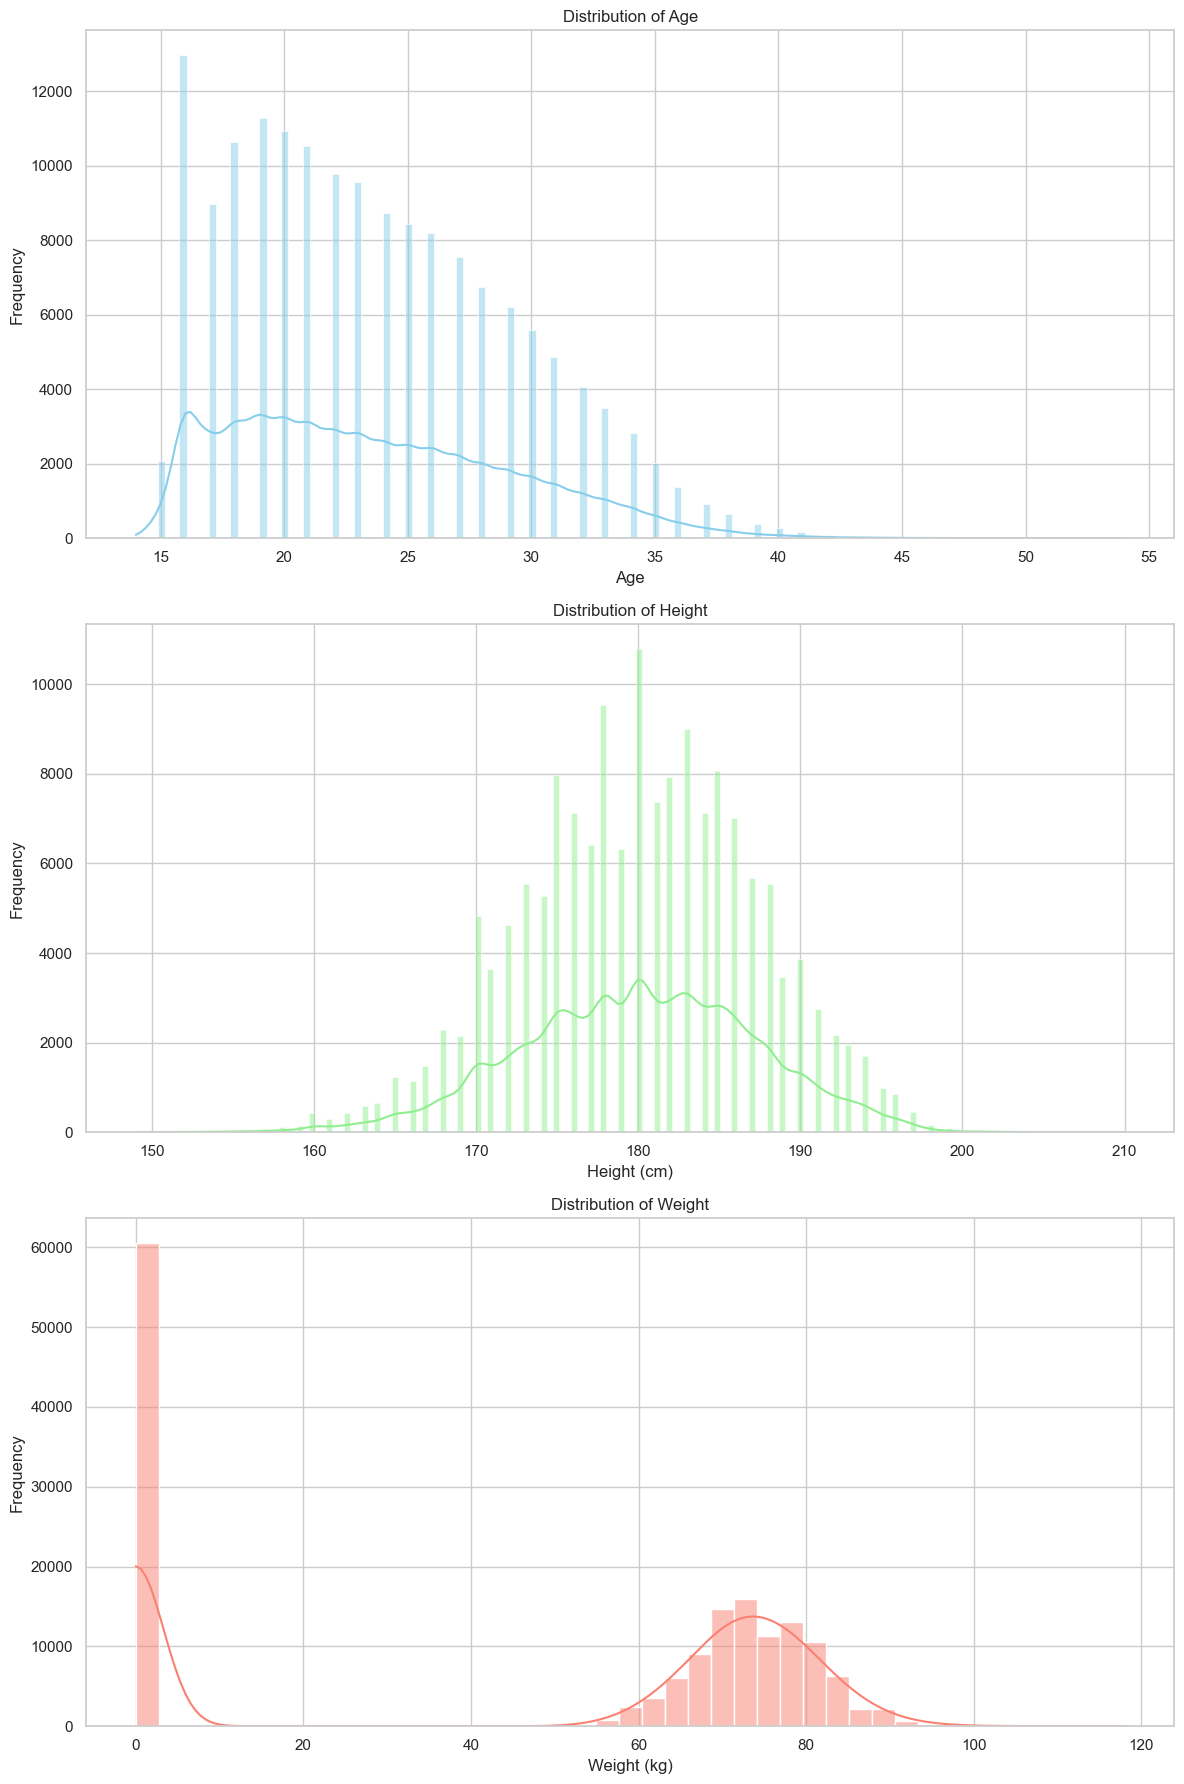

In [10]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure to hold the subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Distribution of Age
sns.histplot(dataset['Age'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# Distribution of Height
sns.histplot(dataset['Height'], kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Distribution of Height')
ax[1].set_xlabel('Height (cm)')
ax[1].set_ylabel('Frequency')

# Distribution of Weight
sns.histplot(dataset['Weight'], kde=True, ax=ax[2], color='salmon')
ax[2].set_title('Distribution of Weight')
ax[2].set_xlabel('Weight (kg)')
ax[2].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

Age Distribution: This histogram illustrates the distribution of player ages, complemented by a kernel density estimate that outlines the probability density of the data, showing where ages cluster most densely.

Height Distribution: This graph displays variations in player heights, offering insights into the range of physical statures across the dataset, which may be significant for different sports positions.

Weight Distribution: This chart shows how player weights are distributed, providing information on the overall physical attributes of the players, which may influence their suitability for specific roles or positions in sports

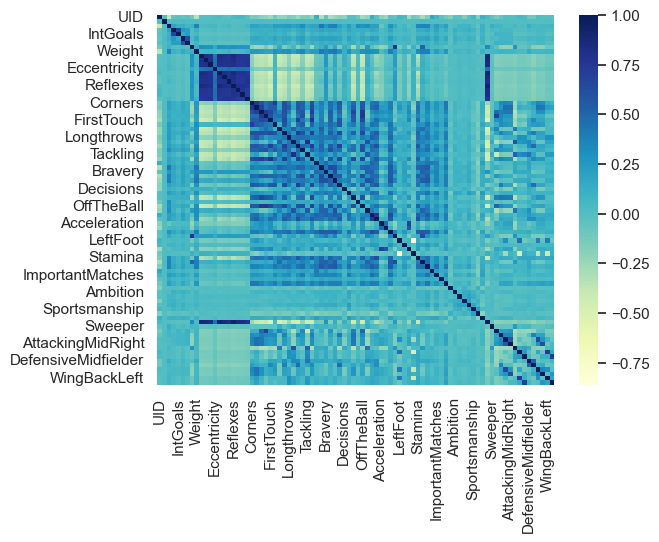

In [11]:
dataset_corr = sns.heatmap(dataset.corr(), cmap="YlGnBu")
plt.show()

Lets check what columns do we have in our dataset

In [12]:
dataset.columns

Index(['UID', 'NationID', 'Age', 'IntCaps', 'IntGoals', 'U21Caps', 'U21Goals',
       'Height', 'Weight', 'AerialAbility', 'CommandOfArea', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'OneOnOnes', 'Reflexes',
       'RushingOut', 'TendencyToPunch', 'Throwing', 'Corners', 'Crossing',
       'Dribbling', 'Finishing', 'FirstTouch', 'Freekicks', 'Heading',
       'LongShots', 'Longthrows', 'Marking', 'Passing', 'PenaltyTaking',
       'Tackling', 'Technique', 'Aggression', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decisions', 'Determination',
       'Flair', 'Leadership', 'OffTheBall', 'Positioning', 'Teamwork',
       'Workrate', 'Acceleration', 'Agility', 'Balance', 'Jumping', 'LeftFoot',
       'NaturalFitness', 'Pace', 'RightFoot', 'Stamina', 'Strength',
       'Consistency', 'Dirtiness', 'ImportantMatches', 'InjuryProness',
       'Versatility', 'Adaptability', 'Ambition', 'Loyalty', 'Pressure',
       'Professional', 'Sportsmanship'

We will only take first 10000 rows to reduce dataset size and make computation possible on our personal computers

In [13]:
dataset = dataset.iloc[:10000,:]

The main goal here is to study and learn about how football players differ based on their "Pace" and "Acceleration" attributes. By using clustering methods, we plan to find distinct groups of players who share similar speed traits. This can assist coaches, scouts, and team analysts in making better choices when it comes to selecting players and forming team strategies.

Lets us now transform the data in such a way that it has a mean of 0 and a standard deviation of 1.

For this we use StandardScaler

In [14]:
scaler = StandardScaler() # Define the scaler
data_scaled = scaler.fit_transform(dataset) # Scale the values

range_clusters = range(2, 11) # Define the number of cluster that we may want or can be formed
silhouette_scores = []
inertia = []

Now lets calculate WSS (Within cluster sum of squares) and silhouette score for each k value

In [15]:
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42) # Define KMeans model
    cluster_labels = kmeans.fit_predict(data_scaled) # Apply KMeans
    silhouette_scores.append(silhouette_score(data_scaled, cluster_labels)) # Append silhouette scores
    inertia.append(kmeans.inertia_) # Append WSS

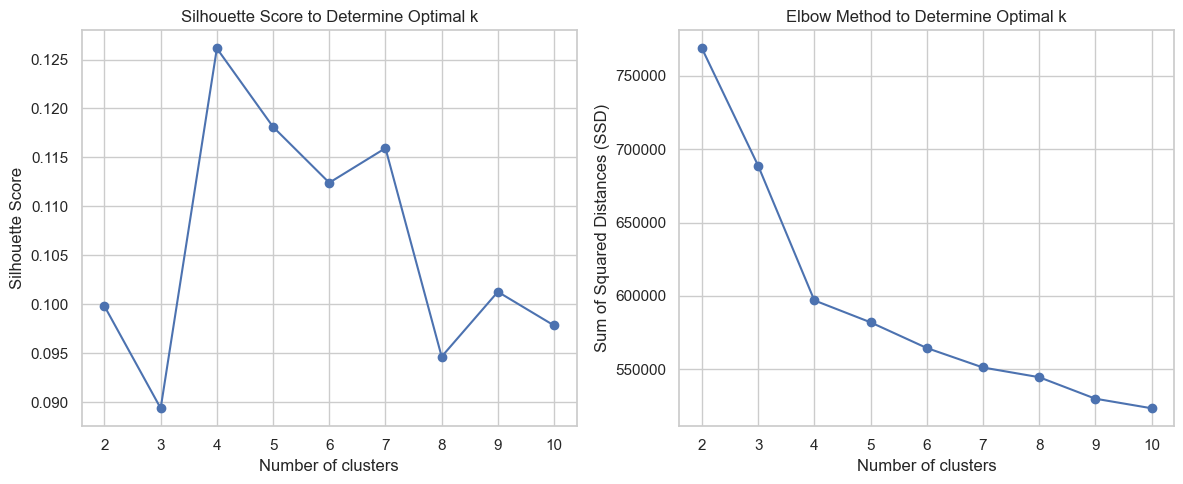

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Determine Optimal k')

plt.subplot(1, 2, 2)
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method to Determine Optimal k')

plt.tight_layout()
plt.show()

From the elbow method we can infer that optimum k value can range from (4,6)

Now we will check silhouette score for each of then and determine which is optimum k value

In [17]:
max_score = []
k_values = []

for i in range(4,10):
    k_values.append(i)
    print(i)
    print(silhouette_scores[i-2])
    max_score.append(silhouette_scores[i-2])
    print('\n')
max_index = max_score.index(max(max_score))
print(f'k value with max silhouette score is : {k_values[max_index]}')

4
0.12613975543232644


5
0.11811994030635803


6
0.11241266837434714


7
0.1159462672523447


8
0.09463986885651521


9
0.10126749184136268


k value with max silhouette score is : 4


Here we can see that silhouette score is maximum at k = 4

So we take optimul k value as 4

In [18]:
optimal_k = 4

Now, lets do Kmeans clustering and Agglomerative

In [19]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
agglo = AgglomerativeClustering(n_clusters=optimal_k)

In [20]:
dataset['kmeans_labels'] = kmeans.fit_predict(data_scaled)
dataset['agglo_labels'] = agglo.fit_predict(data_scaled)

In [21]:
kmeans_silhouette = silhouette_score(data_scaled, dataset['kmeans_labels'])
agglo_silhouette = silhouette_score(data_scaled, dataset['agglo_labels'])

In [22]:
print(f'K-means Silhouette Score: {kmeans_silhouette}')
print(f'Agglomerative Silhouette Score: {agglo_silhouette}')

K-means Silhouette Score: 0.12613975543232644
Agglomerative Silhouette Score: 0.11026762253606134


K-means Silhouette Score (0.126): This score is quite low, suggesting that the players grouped together in clusters are not very distinct from players in other clusters. They're closer to their own group than to others, but not by much. It means that while players are grouped together, they're not as tightly-knit in their similarities as we'd like.

Agglomerative Silhouette Score (0.110): This score is also low and a bit less than the K-means score. It indicates that the player groups are slightly more mixed and the boundaries between different groups are even less clear

Lets Plot the oucomes

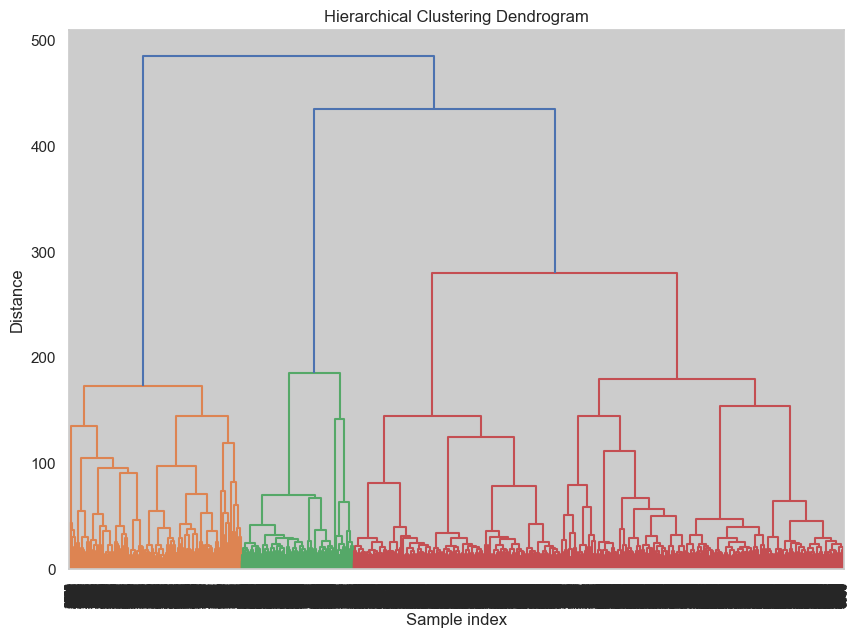

In [23]:
Z = linkage(data_scaled, method='ward') # Define dataset and linkage method to use

plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

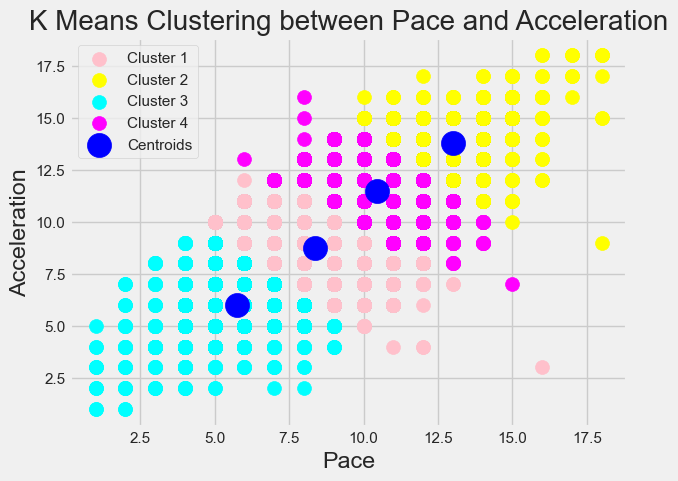

In [25]:
plt.style.use('fivethirtyeight')

features = dataset[['Pace', 'Acceleration']].values  # Convert DataFrame to NumPy array

# Applying KMeans Clustering
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(features)

# Scatter plots of the Clusters
plt.scatter(features[y_means == 0, 0], features[y_means == 0, 1], s=100, c='pink', label='Cluster 1')
plt.scatter(features[y_means == 1, 0], features[y_means == 1, 1], s=100, c='yellow', label='Cluster 2')
plt.scatter(features[y_means == 2, 0], features[y_means == 2, 1], s=100, c='cyan', label='Cluster 3')
plt.scatter(features[y_means == 3, 0], features[y_means == 3, 1], s=100, c='magenta', label='Cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='blue', label='Centroids')

# Setting the plot titles and labels
plt.title('K Means Clustering between Pace and Acceleration', fontsize=20)
plt.xlabel('Pace')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()

Cluster 1 (Pink): Data points in this cluster have low 'Acceleration' and a wide range of 'Pace'. This could represent a segment with standard acceleration but varying speeds.  

Cluster 2 (Green): This cluster is characterized by moderate 'Acceleration' and 'Pace'. These could be individuals or items that have average performance on both metrics.

Cluster 3 (Yellow): High 'Acceleration' and 'Pace'. This is likely the high-performance group.

Cluster 4 (Purple): Varied 'Acceleration' with generally higher 'Pace' values. This group seems to be fast but with a spread in their acceleration capability.

What does centroid depict?

Average Indicator: Centroids signify the average 'Pace' and 'Acceleration' values for the players in their cluster, providing a quick snapshot of the cluster's typical performance attributes.

Organizing Principle: When applying K-means to 'Pace' and 'Acceleration', the centroids guide the formation of clusters by uniting players with the closest similarity in these attributes, ensuring each player is placed in a group with the most alike performance stats.

Cluster Characteristics: The location of a centroid in the scatter plot reflects the common traits of the players in that cluster. A centroid placed at higher values for both 'Pace' and 'Acceleration' identifies a cluster of players who are likely fast and quick, essential qualities for certain athletic roles.

Coach can use these clusters to categorize players into different types that can inform decision-making processes in team building and tactics development, target player recruitment efforts based on the team's strategic needs. if a team lacks fast strikers , they could focus on scouting players from cluster 3.